<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-используемых-библиотек" data-toc-modified-id="Импорт-используемых-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт используемых библиотек</a></span></li><li><span><a href="#Чтение-файла-с-данными" data-toc-modified-id="Чтение-файла-с-данными-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Чтение файла с данными</a></span></li><li><span><a href="#Изучение-общей-информации" data-toc-modified-id="Изучение-общей-информации-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучение общей информации</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Подготовка признаков</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LGBM" data-toc-modified-id="LGBM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#RandomForest" data-toc-modified-id="RandomForest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>RandomForest</a></span></li><li><span><a href="#DecisionTree" data-toc-modified-id="DecisionTree-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>DecisionTree</a></span></li><li><span><a href="#Lasso" data-toc-modified-id="Lasso-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Lasso</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

# Описание данных

**Признаки**
* `DateCrawled` — дата скачивания анкеты из базы

* `VehicleType` — тип автомобильного кузова

* `RegistrationYear` — год регистрации автомобиля

* `Gearbox` — тип коробки передач

* `Power` — мощность (л. с.)

* `Model` — модель автомобиля

* `Kilometer` — пробег (км)

* `RegistrationMonth` — месяц регистрации автомобиля

* `FuelType` — тип топлива

* `Brand` — марка автомобиля

* `NotRepaired` — была машина в ремонте или нет

* `DateCreated` — дата создания анкеты

* `NumberOfPictures` — количество фотографий автомобиля

* `PostalCode` — почтовый индекс владельца анкеты (пользователя)

* `LastSeen` — дата последней активности пользователя

**Целевой признак**
* `Price` — цена (евро)

## Подготовка данных

### Импорт используемых библиотек

In [1]:
# импорт библиотеки pandas
import pandas as pd

# импорт библиотеки numpy
import numpy as np

import time

# импорт библиотеки matplotlib
import matplotlib.pyplot as plt

# импорт функции train_test_split из библиотеки sklearn
from sklearn.model_selection import train_test_split

# импорт кросс-валидации из библиотеки sklearn
from sklearn.model_selection import cross_val_score

# импорт метода стандартизации данных из библиотеки sklearn
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

# импорт средней квадратичной ошибки из библиотеки sklearn
from sklearn.metrics import mean_squared_error

# импорт make_scorer из библиотеки sklearn
from sklearn.metrics import make_scorer

# импорт алгоритма поиска по гиперпараметрам из библиотеки sklearn
from sklearn.model_selection import GridSearchCV

# импорт алгоритма дерева принятия решений из библиотеки sklearn
from sklearn.tree import DecisionTreeRegressor

# импорт алгоритма случайного леса из библиотеки sklearn
from sklearn.ensemble import RandomForestRegressor

# импорт градиентного бустинга из библиотеки catboost
from catboost import CatBoostRegressor

# импорт градиентного бустинга из библиотеки lightgbm
from lightgbm import LGBMRegressor

### Чтение файла с данными

In [2]:
# чтение файла с данными
data = pd.read_csv('/datasets/autos.csv')

### Изучение общей информации

In [3]:
# получение случайных 10 строк датасета
data.sample(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
59396,2016-03-08 04:32:44,170,small,1997,manual,60,polo,150000,7,petrol,volkswagen,NaN,2016-03-08 00:00:00,0,35112,2016-03-10 07:46:03
311559,2016-03-30 22:43:25,1500,wagon,1993,manual,116,80,150000,10,petrol,audi,no,2016-03-30 00:00:00,0,86845,2016-04-05 13:16:19
73504,2016-03-22 17:54:49,550,wagon,1998,manual,101,3er,150000,9,petrol,bmw,NaN,2016-03-22 00:00:00,0,52134,2016-03-22 17:54:49
45202,2016-03-21 17:48:59,16200,wagon,2013,auto,140,superb,70000,1,gasoline,skoda,no,2016-03-21 00:00:00,0,63741,2016-04-06 18:45:20
88634,2016-03-07 11:59:07,1150,small,2001,manual,60,punto,150000,6,petrol,fiat,no,2016-03-07 00:00:00,0,86687,2016-03-18 00:16:05
165214,2016-03-11 15:51:35,8300,sedan,2007,auto,143,1er,150000,10,gasoline,bmw,no,2016-03-11 00:00:00,0,50933,2016-03-23 13:16:26
46224,2016-03-14 01:49:32,1700,sedan,1994,manual,140,80,150000,10,petrol,audi,no,2016-03-13 00:00:00,0,96129,2016-03-27 11:15:50
122117,2016-03-11 15:53:18,5000,sedan,2008,NaN,150,1er,150000,10,gasoline,bmw,no,2016-03-11 00:00:00,0,17489,2016-03-11 16:42:31
9830,2016-03-31 21:48:04,15990,suv,2010,manual,156,4_reihe,70000,5,gasoline,peugeot,no,2016-03-31 00:00:00,0,75245,2016-04-06 17:17:29
156236,2016-03-12 11:56:47,2100,wagon,2004,manual,136,6_reihe,150000,8,gasoline,mazda,no,2016-03-12 00:00:00,0,95355,2016-04-06 07:16:46


In [4]:
# получение общей информации о данных датасета
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [5]:
# получение описательной статистики данных датасета
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
# проверка на наличие дубликатов
data.duplicated().sum()

4

In [7]:
# подсчёт пропусков
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [8]:
# подсчёт доли пропусков от общего количества данных
data.isna().sum() / data.shape[0] * 100

DateCrawled           0.000000
Price                 0.000000
VehicleType          10.579368
RegistrationYear      0.000000
Gearbox               5.596709
Power                 0.000000
Model                 5.560588
Kilometer             0.000000
RegistrationMonth     0.000000
FuelType              9.282697
Brand                 0.000000
NotRepaired          20.079070
DateCreated           0.000000
NumberOfPictures      0.000000
PostalCode            0.000000
LastSeen              0.000000
dtype: float64

После первичного знакомства с нашими данными можно сделать вывод, что:

* В столбце `Price` есть аномальное значение 0.

* В столбце `RegistrationYear` есть аномальные значения, а именно, минимальный год выпуска 1000 год, а максимальный 9999.

* В столбце `Power` минимальное значение 0 (вероятно данные не указаны), а максимальное значение 20000, что выглядит не реалистичным.

* В столбце `Kilometer` значения целые, вероятно они выбираются из какого-то диапазона на сайте.

* В столбце `RegistrationMonth` есть нулевые значения, что скорее всего говорит об отсутствии данных.

* В столбце `NumberOfPictures` не ни одного значения. Этот столбец может быть удален, так как не несет никакой полезной информации.

* В столбце `PostalCode` индексы содержат 4 и 5 цифр, что странно, так как обычно индекс состоит из 6 цифр. В данном случае данный столбец также не является важным и может быть удален.

* Данные содержат 4 дубликата.

* В столбцах `VehicleType`, `Gearbox`, `Model`, `FuelType` и `NotRepaired` содержатся пропуски, в некоторых всего 5% от всего объема данных, но в одном - 20% от всего объема данных, что очень много.

Необходима следующая предобработка данных:

* Приведем наименования столбцов к змеиному регистру.

* Удалим дубликаты.

* Удалим столбцы, которые не несут важной информации для построения модели, такие как дата скачивания анкеты из базы `DateCrawled`, дата создания анкеты `DateCreated`, количество фотографий автомобиля `NumberOfPictures`, почтовый индекс владельца анкеты (пользователя) `PostalCode` и дата последней активности пользователя `LastSeen`.

* Разберемся с аномалиями и пропусками.

### Предобработка данных

Избавимся от дубликатов.

In [9]:
# удаление дубликатов
data = data.drop_duplicates().reset_index(drop=True)

In [10]:
# проверка на наличие дубликатов
data.duplicated().sum()

0

Удалим столбцы, которые не имеют значения для данного исследования

In [11]:
# удаление столбцов
df =  data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis = 1)

Приведем столбцы к змеиному регистру.

In [12]:
# приведение названий столбцов к нижнему регистру
df.columns = df.columns.str.lower()

In [13]:
# отображение названий столбцов
df.columns

Index(['price', 'vehicletype', 'registrationyear', 'gearbox', 'power', 'model',
       'kilometer', 'registrationmonth', 'fueltype', 'brand', 'notrepaired'],
      dtype='object')

In [14]:
# переименование столбцов
df = df.rename(columns={
    'vehicletype': 'vehicle_type', 
    'registrationyear': 'registration_year', 
    'registrationmonth': 'registration_month',
    'fueltype': 'fuel_type', 
    'notrepaired': 'not_repaired',
})

In [15]:
# получение первых 5 строк датасета
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired
0,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no


Разберемся с аномалиями.

В столбце `price` есть аномальное значение 0. Посмотрим насколько много таких значений.

In [16]:
# вывод количества аномальных значений
print('Колличество аномальных значений в столбце price:',
      round(df[df['price'] == 0].shape[0] / df.shape[0] * 100),'%')

Колличество аномальных значений в столбце price: 3 %


Объявлений с ценой 0 всего 3% от общего объема данных, поэтому просто удилим такие объявления из рассмотрения.

In [17]:
# удаление аномальных значений
df = df.loc[df['price'] != 0]

В столбце `registration_year` есть аномальные значения, а именно, минимальный год выпуска 1000 год, а максимальный 9999.

Мы знаем, что серийное производство автомобилей началось приблизительно в 1900 годах. Предположим, что теоретически такие автомобили живы и могут появляться на площадках. Так что 1900 будет нашей отправной точкой, а конечной 2019 год. После него года нереалистичные.

In [18]:
# просмотр уникальных значений и их количества
df.loc[(df['registration_year'] < 1900) | (df['registration_year'] > 2018)].registration_year.value_counts().sort_index(ascending=True)

1000    31
1001     1
1039     1
1111     1
1234     4
1255     1
1300     2
1400     1
1500     3
1600     2
1602     1
1800     5
2019    16
2066     1
2200     1
2222     1
2290     1
2500     3
2800     1
2900     1
3000     6
3200     1
3700     1
3800     1
4000     3
4100     1
4500     2
4800     1
5000    16
5300     1
5555     2
5600     1
5900     1
5911     2
6000     5
6500     1
7000     4
7100     1
7800     1
8000     2
8200     1
8500     1
8888     1
9000     2
9450     1
9999    18
Name: registration_year, dtype: int64

In [19]:
# подсчет аномальных значений
reg_year_anom = df.loc[(df['registration_year'] < 1900) | (df['registration_year'] > 2019)].registration_year.value_counts().sum()
reg_year_anom

139

Таких значений мало, поэтому их удаление не внесет ощутимого эффекта.

In [20]:
# удаление аномальных значений
df = df.loc[(df['registration_year'] >= 1900) & (df['registration_year'] <= 2017)]

В столбце `power` минимальное значение 0 (вероятно данные не указаны), а максимальное значение 20000, что выглядит не реалистичным.

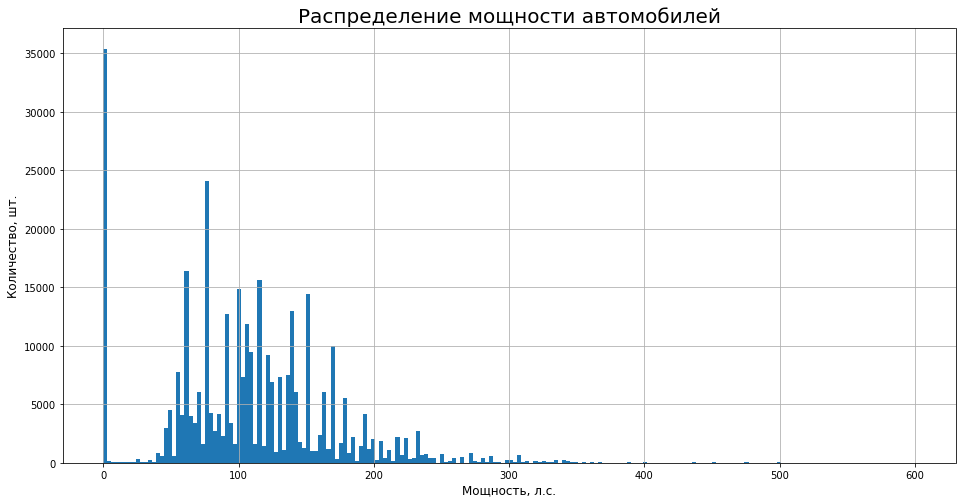

In [21]:
# построение распределения
df['power'].hist(bins=200, range=(0, 600), figsize=(16,8))
plt.title('Распределение мощности автомобилей', fontsize=20)
plt.xlabel('Мощность, л.с.', fontsize=12)
plt.ylabel('Количество, шт.', fontsize=12)
plt.show()

In [22]:
# вывод количества аномальных значений
print('Колличество аномальных значений в столбце power:',
      round(df.loc[(df['power'] < 50) | (df['power'] > 500)].shape[0] / df.shape[0] * 100),'%')

Колличество аномальных значений в столбце power: 12 %


Аномальных данных много, но от них все равно лучше избавиться, чтобы не портить модель.

In [23]:
# удаление аномальных значений
df = df.loc[(df['power'] >= 50) & (df['power'] <= 500)]

В столбце `registration_month` есть нулевые значения, что скорее всего говорит об отсутствии данных.

In [24]:
# получение уникальных значений и их количества
df['registration_month'].value_counts().sort_index(ascending=True)

0     18828
1     20168
2     18880
3     30584
4     25883
5     25728
6     27736
7     23955
8     19863
9     21033
10    23049
11    21181
12    21335
Name: registration_month, dtype: int64

Всего получается 13 месяцев. Очевидно, что нулевой месяц - это отсутствие значения. В целом, эти данные также не будут иметь большой вес в модели, поэтому их удалим.

In [25]:
# удаление столбцов
df =  df.drop('registration_month', axis = 1)

In [26]:
# получение общей информации о данных датасета
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 298223 entries, 1 to 354364
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   price              298223 non-null  int64 
 1   vehicle_type       280349 non-null  object
 2   registration_year  298223 non-null  int64 
 3   gearbox            292771 non-null  object
 4   power              298223 non-null  int64 
 5   model              286750 non-null  object
 6   kilometer          298223 non-null  int64 
 7   fuel_type          280398 non-null  object
 8   brand              298223 non-null  object
 9   not_repaired       253714 non-null  object
dtypes: int64(4), object(6)
memory usage: 25.0+ MB


Устраним пропуски.

In [27]:
# подсчёт пропусков
df.isna().sum()

price                    0
vehicle_type         17874
registration_year        0
gearbox               5452
power                    0
model                11473
kilometer                0
fuel_type            17825
brand                    0
not_repaired         44509
dtype: int64

In [28]:
# подсчёт доли пропусков от общего количества данных
df.isna().sum() / df.shape[0] * 100

price                 0.000000
vehicle_type          5.993502
registration_year     0.000000
gearbox               1.828162
power                 0.000000
model                 3.847121
kilometer             0.000000
fuel_type             5.977071
brand                 0.000000
not_repaired         14.924738
dtype: float64

In [29]:
# получение уникальных значений и их количества
df['gearbox'].value_counts()

manual    233644
auto       59127
Name: gearbox, dtype: int64

В данных всего 2 вида коробки передач. Скорее всего в пропущеных значениях лежат автоммобили с иной коробкой передач. Например, вариатором. Пропущенные значения заменим на "other".

In [30]:
# заполнение пропущенных значений
df['gearbox'] = df['gearbox'].fillna('other')

В остальных случаях заменим пропущенные значения на "unknown", т.к. восстановить их нет возможности.

In [31]:
# заполнение пропущенных значений
df['vehicle_type'] = df['vehicle_type'].fillna('unknown')
df['model'] = df['model'].fillna('unknown')
df['fuel_type'] = df['fuel_type'].fillna('unknown')
df['not_repaired'] = df['not_repaired'].fillna('unknown')

In [32]:
# подсчёт пропусков
df.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
brand                0
not_repaired         0
dtype: int64

### Подготовка признаков

Данные нужно разбить на две части: обучающую и тестовую. Исходные данные разбивают в соотношении 3:1.

In [33]:
# разделите данные на обучающую и тестовую выборки
df_train, df_test = train_test_split(df, test_size=0.25, random_state=12345)

In [34]:
# проверка размера выборок
df_train.shape[0], df_test.shape[0]

(223667, 74556)

In [35]:
# создание переменные для признаков и целевого признака
features_train = df_train.drop(['price'], axis=1)
target_train = df_train['price']
features_test = df_test.drop(['price'], axis=1)
target_test = df_test['price']

In [36]:
# проверка размера выборок признаков
features_train.shape, features_test.shape

((223667, 9), (74556, 9))

Данные разделены успешно.

In [37]:
# создание переменные для признаков для lasso
features_train_lasso = features_train
features_test_lasso = features_test

В нашем датасете присутствуют категориальные признаки в столбцах `vehicle_type`, `gearbox`, `model`, `fuel_type`, `brand` и `not_repaired`. Для обучения модели подходят только численные данные.

In [38]:
# преобразование категориальных признаков
numeric = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'not_repaired']
encoder = OrdinalEncoder()
encoder.fit(features_train[numeric])
features_train[numeric] = encoder.transform(features_train[numeric])
features_test[numeric] = encoder.transform(features_test[numeric])

In [39]:
features_train.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
128337,8.0,2004,1.0,116,101.0,150000,6.0,31.0,0.0
181360,0.0,1999,1.0,114,99.0,150000,6.0,27.0,2.0
347405,0.0,2003,1.0,101,150.0,150000,2.0,24.0,0.0
282513,5.0,2015,1.0,90,83.0,10000,6.0,24.0,0.0
96593,4.0,2002,1.0,101,116.0,150000,2.0,38.0,0.0


In [40]:
# проверка размера выборок признаков
features_train.shape, features_test.shape

((223667, 9), (74556, 9))

In [ ]:
####Код ревьюера
print(features_train[0])
len(features_train[0])

Так как будет использоваться Lasso, используем OHE и масштабирование.

In [41]:
# преобразование категориальных признаков
features_train_lasso = pd.get_dummies(features_train_lasso, drop_first=True)
features_test_lasso = pd.get_dummies(features_test_lasso, drop_first=True)

In [42]:
# проверка размера выборок признаков
features_train_lasso.shape, features_test_lasso.shape

((223667, 9), (74556, 9))

In [43]:
# При записи изменённых признаков в исходный датафрейм код может вызывать предупреждение SettingWithCopy.
# Причина в особенности поведения sklearn и pandas.
# Специалисты уже привыкли игнорировать такое сообщение.
# Чтобы предупреждение не появлялось, в код добавляют строчку:
pd.options.mode.chained_assignment = None

In [44]:
# стандартизация данных
numeric_new = ['registration_year', 'power', 'kilometer']
scaler = StandardScaler()
features_train_lasso[numeric_new] = scaler.fit_transform(features_train_lasso[numeric_new])
features_test_lasso[numeric_new] = scaler.fit_transform(features_test_lasso[numeric_new])

In [45]:
# проверка размера выборок признаков
features_train_lasso.shape, features_test_lasso.shape

((223667, 9), (74556, 9))

In [46]:
features_train_lasso.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired
128337,8.0,0.106816,1.0,-0.108988,101.0,0.584954,6.0,31.0,0.0
181360,0.0,-0.648578,1.0,-0.146912,99.0,0.584954,6.0,27.0,2.0
347405,0.0,-0.044262,1.0,-0.393418,150.0,0.584954,2.0,24.0,0.0
282513,5.0,1.768684,1.0,-0.602000,83.0,-3.253728,6.0,24.0,0.0
96593,4.0,-0.195341,1.0,-0.393418,116.0,0.584954,2.0,38.0,0.0


## Обучение моделей

Прежде чем приступим к обучению модели, напишем функцию для вычисления скорости выполнения, а так же RMSE и сделаем оценку для кросс-валидации.

In [47]:
def RMSE(target,predictions):
    MSE = mean_squared_error(target, predictions)
    return MSE ** 0.5
RMSE_score = make_scorer(RMSE, greater_is_better=False)

In [48]:
def best_model(model, params, features_train, target_train, features_test, target_test):
    start_time = time.time()
    grid = GridSearchCV(model, param_grid = params, cv=4,
                                            scoring = RMSE_score, n_jobs=-1)
    grid.fit(features_train,target_train)
    first_time = time.time() - start_time
    start_time = time.time()
    predict = grid.predict(features_test)
    second_time = time.time() - start_time
    return first_time, second_time, RMSE(target_test, predict)

### LGBM

In [49]:
%%time
model_lgbm = LGBMRegressor(random_state=42)
lgbm_params = {
    'n_estimators': [10,100],
    'max_depth': [15,30],
    'num_leaves': [10,31],
    'learning_rate': [0.1]
}
lgbm = best_model(model_lgbm, lgbm_params, features_train, target_train, features_test, target_test)

CPU times: user 1min 36s, sys: 246 ms, total: 1min 36s
Wall time: 1min 37s


In [50]:
lgbm

(96.85186553001404, 0.690711498260498, 1694.6969047466253)

Отлично, на выходе у нас получается время обучения, время предсказания и наша метрика.

### CatBoost

In [ ]:
%%time
model_catboost = CatBoostRegressor(random_state=42,silent=True)
catboost_params = {
    'learning_rate': [0.1],
    'iterations': [10,100],
    'max_depth': [10,15]
}
cat_boost = best_model(model_catboost, catboost_params, features_train, target_train, features_test, target_test)

### RandomForest

In [52]:
%%time
model_rf = RandomForestRegressor(random_state=42)
forestregressor_params = {'n_estimators':range(10, 31, 10),
             'max_depth':range (1,10)}
random_forest = best_model(model_rf, forestregressor_params, features_train, target_train, features_test, target_test)

CPU times: user 4min 38s, sys: 2.19 s, total: 4min 40s
Wall time: 4min 41s


### DecisionTree

In [53]:
%%time
model_dt = DecisionTreeRegressor(random_state=42)
treeregressor_params = {'max_depth':range (1,10)}
decision_trees = best_model(model_dt, treeregressor_params, features_train, target_train, features_test, target_test)

CPU times: user 9.19 s, sys: 59.2 ms, total: 9.25 s
Wall time: 9.29 s


### Lasso

In [54]:
from sklearn.linear_model import Lasso
#import warnings
#warnings.filterwarnings('ignore')

In [55]:
%%time
model_ls = Lasso(tol=1e-2, random_state=42)
lasso_params = {'alpha':[0.02, 0.03]}
lasso = best_model(model_ls, lasso_params, features_train_lasso, target_train, features_test_lasso, target_test)

CPU times: user 6.1 s, sys: 7.73 s, total: 13.8 s
Wall time: 14.1 s


## Анализ моделей

In [56]:
models = pd.DataFrame([lgbm, cat_boost, random_forest, decision_trees, lasso], 
             columns=['Время подбора гиперпараметров и обучения', 'Время предсказания', 'RMSE'], 
                      index=['LGBM','CatBoost', 'RandomForest', 'DecisionTrees', 'Lasso'])
models

,Время подбора гиперпараметров и обучения,Время предсказания,RMSE
LGBM,96.851866,0.690711,1694.696905
CatBoost,302.023652,0.054462,1614.592322
RandomForest,280.914006,0.178544,1953.736715
DecisionTrees,9.283405,0.009976,2026.603296
Lasso,14.063324,0.063866,2879.975603


Итак, модели обучены. Исходя из таблицы выше можно сделать вывод, что:

1. Самое высокое качество предсказания у модели CatBoost, но у этого алгоритма большие временные затраты.
2. Самое быстрое время подбора гиперпараметров и обучения, а также время предсказания у модели DecisionTrees, но при этом низкое качество.

Исходя из таблицы выигрывает CatBoost, у данного алгоритма высокие качество и скорость предсказания. Так что можно сделать вывод, что наилучшая модель для заказчика это CatBoost.